In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Rastgele veri üretimi
np.random.seed(42)
n = 200
tecrube_yili = np.random.uniform(0, 10, n).round(2)
teknik_puan = np.random.uniform(0, 100, n).round(2)

# Etiketleme kuralı:
# Tecrübesi 2 yıldan az ve sınav puanı 60’tan düşük olanlar işe alınmaz (etiket = 1)
etiket = np.where((tecrube_yili < 2) & (teknik_puan < 60), 1, 0)

# Veriyi DataFrame’e dönüştür
df = pd.DataFrame({
    "tecrube_yili": tecrube_yili,
    "teknik_puan": teknik_puan,
    "etiket": etiket
})

print(df.head())


   tecrube_yili  teknik_puan  etiket
0          3.75        64.20       0
1          9.51         8.41       0
2          7.32        16.16       0
3          5.99        89.86       0
4          1.56        60.64       0


In [2]:
# Özellikleri ve hedef değişkeni ayır
X = df[["tecrube_yili", "teknik_puan"]]
y = df["etiket"]

# Eğitim ve test bölmesi (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Modeli oluştur ve eğit
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

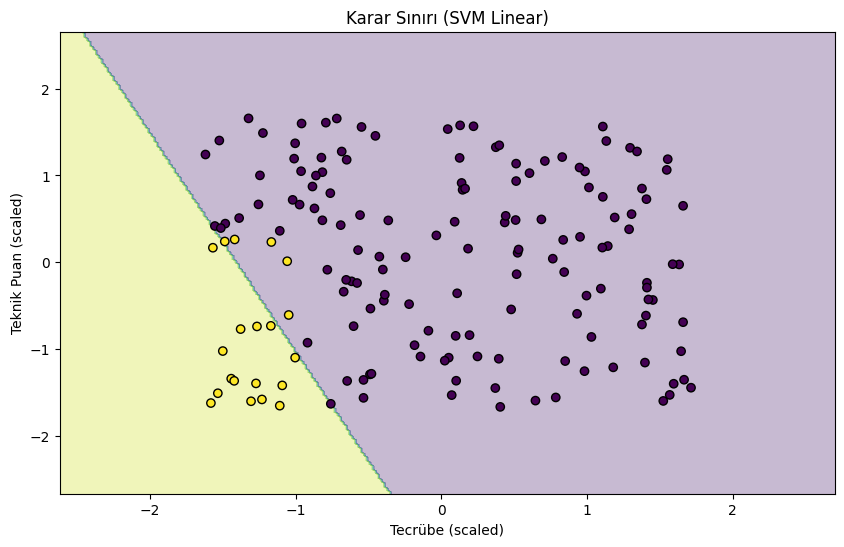

In [5]:
# Görselleştirme için sınırları al
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Tecrübe (scaled)")
    plt.ylabel("Teknik Puan (scaled)")
    plt.title("Karar Sınırı (SVM Linear)")
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, model)


In [6]:
# Kullanıcıdan veri al
try:
    user_tecrube = float(input("Tecrübe yılı (0-10): "))
    user_teknikpuan = float(input("Teknik puan (0-100): "))
    user_input = scaler.transform([[user_tecrube, user_teknikpuan]])
    prediction = model.predict(user_input)

    print("Tahmin:", "İşe alınmadı ❌" if prediction[0] == 1 else "İşe alındı ✅")
except:
    print("Geçersiz giriş.")


Tahmin: İşe alındı ✅


c:\Users\iremm\.conda\envs\BTK-AI\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Test seti üzerinde tahmin
y_pred = model.predict(X_test_scaled)

# Başarı ölçütleri
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Oranı: 0.975

Confusion Matrix:
 [[35  0]
 [ 1  4]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.80      0.89         5

    accuracy                           0.97        40
   macro avg       0.99      0.90      0.94        40
weighted avg       0.98      0.97      0.97        40

